In [19]:
# imports
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, sys, math, site

In [2]:
# modify me

# output path
folder = os.path.expanduser('Z:\\FY24-sshi-Last10pctProject\\national runs\\decarb plots')
outpath = os.path.join(folder, 'maps') 
reedspath = 'C:\\Users\sshi\\Documents\\GitHub\ReEDS-2.0'

# run(s) of interest
runs_folder = 'Z:\\FY24-sshi-Last10pctProject\\national runs'
#'''
# -- scenarios WITH fuel cell deployment
old_scenarios = [os.path.join(runs_folder, '1_USA_noFC_decarb')]
new_scenarios = [os.path.join(runs_folder, '1_USA_decarb')]

# filter data
#tech_name = 'battery'
#tech_ls = ['pumped-hydro','battery']
old_tech = 'H2-CT'
new_tech = 'fuel-cell'
national_bas = [f'p{x}' for x in range(1,135)]
year = 2050
agg_level = 'r' # choose 'st' for the state level or 'r' for the ReEDS BA level, 'county' for county, mixed for mixed resolution runs


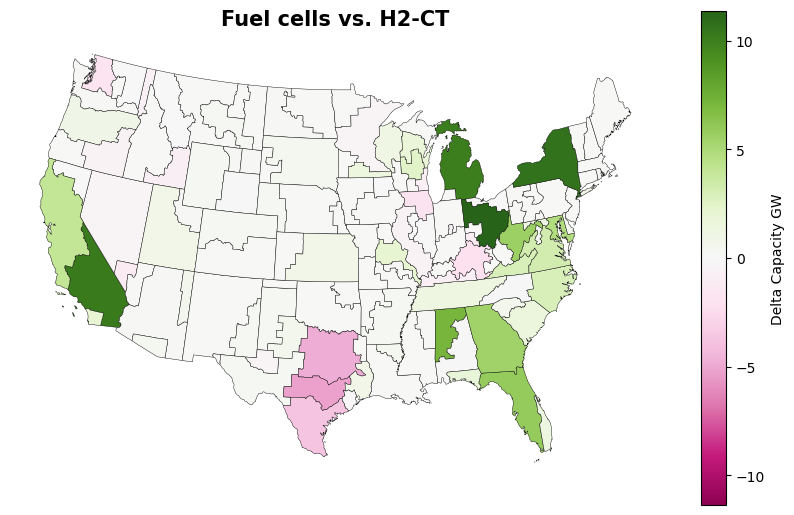

In [10]:
# plot data setup
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), sharex=True, sharey=True)  # 4 rows, 2 columns
plt.figure(figsize= (25,25))

# Ensure 'axes' is a 1D array for easy iteration
#axes = axes.flatten()

# pull in the BA region shapefile
reeds_gdf = gpd.read_file(os.path.join(reedspath,'inputs','shapefiles','US_PCA','US_PCA.shp')).rename(columns = {'rb':'r'})


# map regions, the 'r' column to BAs
ba_df = pd.DataFrame(national_bas,columns=['r'])    

#  Loop through each old scenario
for scenario_idx, scenario_path in enumerate(old_scenarios):
    # Load data for each scenario
    old_df = pd.read_csv(os.path.join(scenario_path, 'outputs', 'cap.csv')).rename(columns={'Value':'capacity_MW'})

    # filter data for the selected technology in tech_name
    old_cap_by_tech = old_df[old_df['i'].str.contains(old_tech)]

    #group the same year and in the same region for each data frame
    old_cap_by_tech = old_cap_by_tech.groupby(['r','t'], as_index=False).sum()
    
    #take capaicty for the speficied year in each region 
    old_cap_by_tech = old_cap_by_tech[old_cap_by_tech['t'] == year]

    # convert capacity from MW to GW
    old_cap_by_tech['capacity_GW'] = old_cap_by_tech['capacity_MW'] / 10**3

    # Merge data with ba mapping
    old_cap_by_tech = ba_df.merge(old_cap_by_tech, how='left').fillna(0)
    old_cap_by_tech = old_cap_by_tech.groupby(['r']).sum()

#  Loop through each new scenario
for scenario_idx, scenario_path in enumerate(new_scenarios):
    # Load data for each scenario
    new_df = pd.read_csv(os.path.join(scenario_path, 'outputs', 'cap.csv')).rename(columns={'Value':'capacity_MW'})

    # filter data for the selected technology in tech_name
    new_cap_by_tech = new_df[new_df['i'].str.contains(new_tech)]

    #group the same year and in the same region for each data frame
    new_cap_by_tech = new_cap_by_tech.groupby(['r','t'], as_index=False).sum()

    #take capaicty for the speficied year in each region 
    new_cap_by_tech = new_cap_by_tech[new_cap_by_tech['t'] == year]

    # convert capacity from MW to GW
    new_cap_by_tech['capacity_GW'] = new_cap_by_tech['capacity_MW'] / 10**3

    # Merge data with ba mapping
    new_cap_by_tech = ba_df.merge(new_cap_by_tech, how='left').fillna(0)
    new_cap_by_tech = new_cap_by_tech.groupby(['r']).sum()

    # calculate capacity difference
    new_cap_by_tech['delta capacity (GW)'] = new_cap_by_tech['capacity_GW'] - old_cap_by_tech['capacity_GW']
    new_cap_by_tech = new_cap_by_tech.drop(columns=new_cap_by_tech.columns[new_cap_by_tech.columns.str.contains('Unnamed')])   
    delta_cap_by_tech = new_cap_by_tech[['t','delta capacity (GW)']]

    ax = plt.subplot(1,3,1 )  #sharex=True,sharey=True) #)

    dfmap = reeds_gdf.merge(new_cap_by_tech, how='inner',on=agg_level)
    vmax = dfmap['delta capacity (GW)'].max()
    vmin = dfmap['delta capacity (GW)'].min()

# plot apeearance
agg_name = 'BA'
ax.patch.set_facecolor('white')
#ax.set_title(f'{tech_name.upper()}: {scen_df.scenario[scenario_idx]}', fontsize=15, fontweight='bold')
ax.set_title(f'Fuel cells vs. H2-CT', fontsize=15, fontweight='bold')
ax.axis('off')

# plot the data
dfmap.plot(ax=ax,column='delta capacity (GW)',cmap='PiYG', legend=True, edgecolor="black", linewidth=0.3, # modify colors
           legend_kwds={'shrink':0.2,'label' : 'Delta Capacity GW'}, vmax = vmax, vmin=-vmax,figsize=(8,7))


# Adjust layout and save plot
plt.tight_layout()
plt.savefig(os.path.join(outpath, f'Capacity_rReplcement{year}_{agg_name}.png'), dpi=300)
plt.show()


PLot all delta maps

In [11]:
# modify me

# output path
folder = os.path.expanduser('Z:\\FY24-sshi-Last10pctProject\\national runs\\decarb plots')
outpath = os.path.join(folder, 'maps') 
reedspath = 'C:\\Users\sshi\\Documents\\GitHub\ReEDS-2.0'

# run(s) of interest
runs_folder = 'Z:\\FY24-sshi-Last10pctProject\\national runs'
#'''
# -- scenarios WITH fuel cell deployment
new_scenarios = [os.path.join(runs_folder, '1_USA_decarb'), 
             os.path.join(runs_folder, '1_USA_high_RE_costs'), 
             os.path.join(runs_folder, '1_USA_low_RE_costs'),
             os.path.join(runs_folder, '1_USA_reduced_RE_availability'), 
             os.path.join(runs_folder, '1_USA_no_CCS'), 
             os.path.join(runs_folder, '1_USA_high_electrification'),
             os.path.join(runs_folder, '1_USA_high_FC_deploy'),
             os.path.join(runs_folder, '1_USA_low_FC_deploy')]
#'''
# -- scenarios WITHOUT fuel cell deployment
old_scenarios = [os.path.join(runs_folder,'1_USA_noFC_decarb'), 
             os.path.join(runs_folder, '1_USA_noFC_high_RE_costs'), 
             os.path.join(runs_folder, '1_USA_noFC_low_RE_costs'),
             os.path.join(runs_folder, '1_USA_noFC_reduced_RE_availability'), 
             os.path.join(runs_folder, '2_USA_noFC_no_CCS'),
             os.path.join(runs_folder, '1_USA_noFC_high_electrification'),
             os.path.join(runs_folder, '1_USA_noFC_decarb'),
             os.path.join(runs_folder, '1_USA_noFC_decarb')]
#'''
# filter data
#tech_name = 'battery'
#tech_ls = ['pumped-hydro','battery']
old_tech = 'H2-CT'
new_tech = 'fuel-cell'
national_bas = [f'p{x}' for x in range(1,135)]
year = 2050
agg_level = 'r' # choose 'st' for the state level or 'r' for the ReEDS BA level, 'county' for county, mixed for mixed resolution runs

# scenarios
scen_df = pd.DataFrame(['Decarb','High RE Costs','Low RE Costs','Reduced RE',
                        'No CCS','High Electrification',
                        'Low FC Costs','High FC Costs'
                        ], columns=['scenario'])

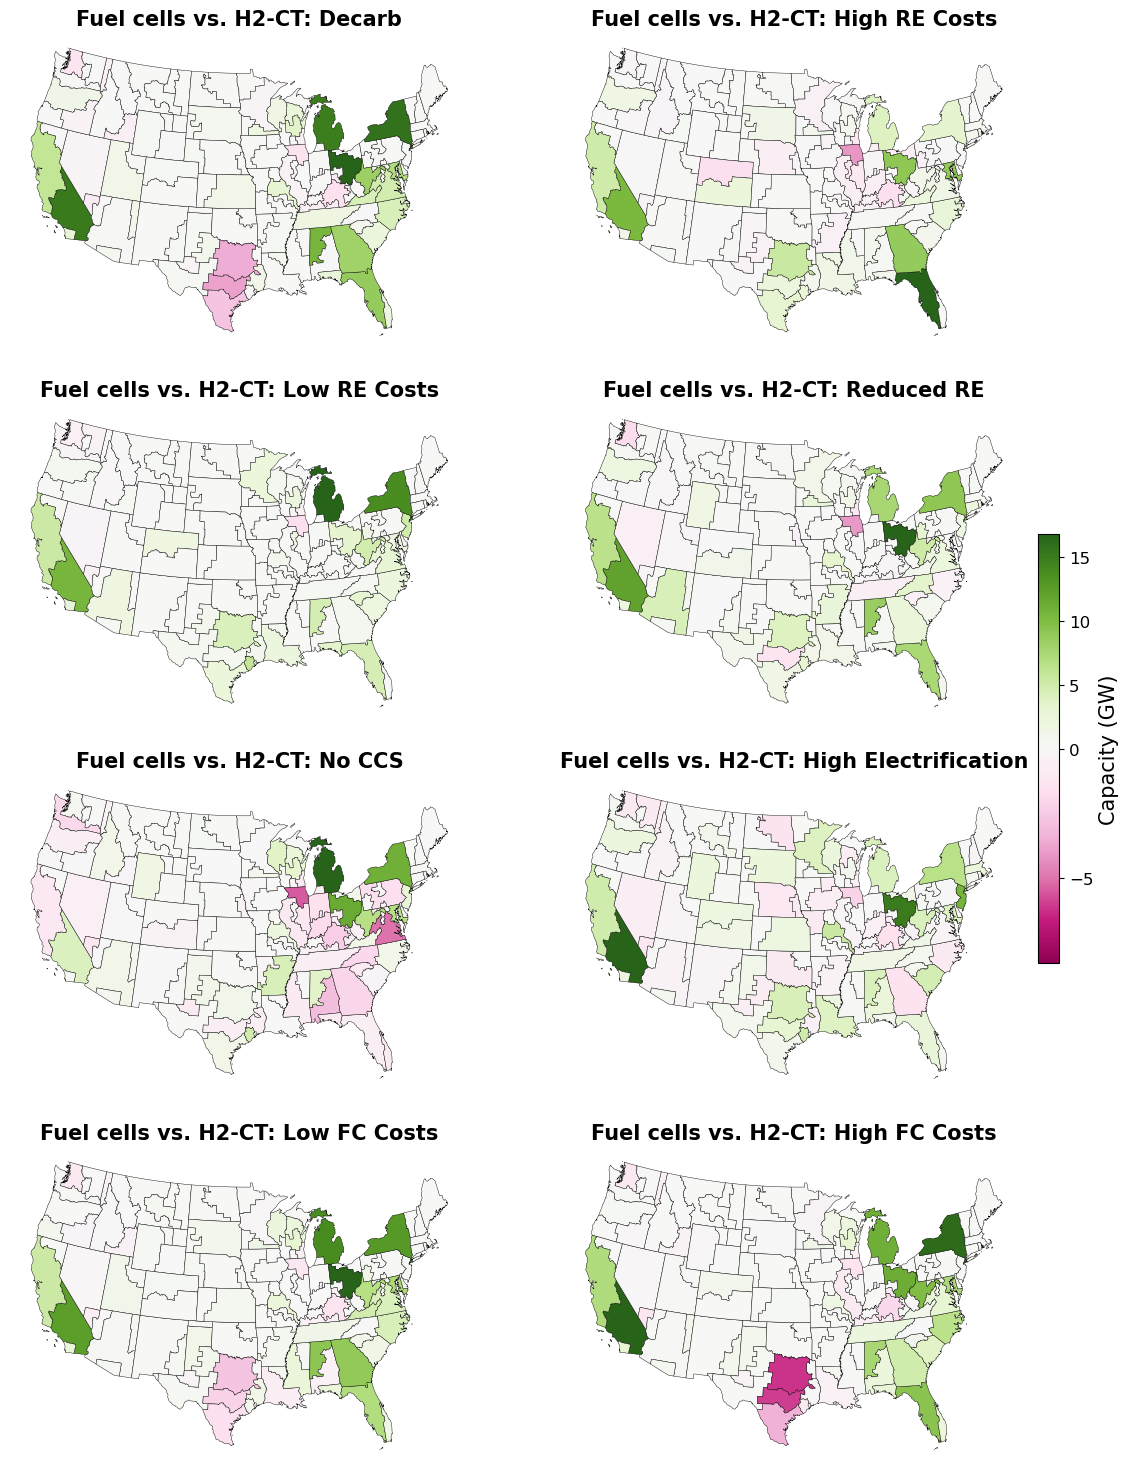

In [23]:
# plot data setup
# Use 3 rows for No FC
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), sharex=True, sharey=True)  # 4 rows, 2 columns

# Ensure 'axes' is a 1D array for easy iteration
axes = axes.flatten()

# pull in the BA region shapefile
reeds_gdf = gpd.read_file(os.path.join(reedspath,'inputs','shapefiles','US_PCA','US_PCA.shp')).rename(columns = {'rb':'r'})

# list to find the upper list for color bar
vmax_ls = []
vmin_ls = []

# map regions, the 'r' column to BAs
ba_df = pd.DataFrame(national_bas,columns=['r'])    

#  Loop through each scenario pair
for scenario_idx in range(len(scen_df)):

    # Load data for each scenario
    old_df = pd.read_csv(os.path.join(old_scenarios[scenario_idx], 'outputs', 'cap.csv')).rename(columns={'Value':'capacity_MW'})

    # filter data for the selected technology in tech_name
    old_cap_by_tech = old_df[old_df['i'].str.contains(old_tech)]

    #group the same year and in the same region for each data frame
    old_cap_by_tech = old_cap_by_tech.groupby(['r','t'], as_index=False).sum()

    #take capaicty for the speficied year in each region 
    old_cap_by_tech = old_cap_by_tech[old_cap_by_tech['t'] == year]

    # convert capacity from MW to GW
    old_cap_by_tech['capacity_GW'] = old_cap_by_tech['capacity_MW'] / 10**3

    # Merge data with ba mapping
    old_cap_by_tech = ba_df.merge(old_cap_by_tech, how='left').fillna(0)
    old_cap_by_tech = old_cap_by_tech.groupby(['r']).sum()


    # Load data for each scenario
    new_df = pd.read_csv(os.path.join(new_scenarios[scenario_idx], 'outputs', 'cap.csv')).rename(columns={'Value':'capacity_MW'})

    # filter data for the selected technology in tech_name
    new_cap_by_tech = new_df[new_df['i'].str.contains(new_tech)]

    #group the same year and in the same region for each data frame
    new_cap_by_tech = new_cap_by_tech.groupby(['r','t'], as_index=False).sum()

    #take capaicty for the speficied year in each region 
    new_cap_by_tech = new_cap_by_tech[new_cap_by_tech['t'] == year]

    # convert capacity from MW to GW
    new_cap_by_tech['capacity_GW'] = new_cap_by_tech['capacity_MW'] / 10**3

    # Merge data with ba mapping
    new_cap_by_tech = ba_df.merge(new_cap_by_tech, how='left').fillna(0)
    new_cap_by_tech = new_cap_by_tech.groupby(['r']).sum()

    # calculate capacity difference
    new_cap_by_tech['delta capacity (GW)'] = new_cap_by_tech['capacity_GW'] - old_cap_by_tech['capacity_GW']
    new_cap_by_tech = new_cap_by_tech.drop(columns=new_cap_by_tech.columns[new_cap_by_tech.columns.str.contains('Unnamed')])   
    delta_cap_by_tech = new_cap_by_tech[['t','delta capacity (GW)']]

    #ax = plt.subplot(1,3,1 )  #sharex=True,sharey=True) #)
    
    dfmap = reeds_gdf.merge(new_cap_by_tech, how='inner',on=agg_level)
    vmax = dfmap['delta capacity (GW)'].max()
    vmin = dfmap['delta capacity (GW)'].min()
    vmax_ls.append(vmax)
    vmin_ls.append(vmin)

    # plot the data
    ax=axes[scenario_idx]
    dfmap.plot(ax=ax,column='delta capacity (GW)',cmap='PiYG', edgecolor="black", linewidth=0.3, # modify colors
            legend_kwds={'label' : 'Delta Capacity GW'}, vmax = vmax, vmin=-vmax,figsize=(8,7))

    # plot apeearance
    agg_name = 'BA'
    ax.patch.set_facecolor('white')
    #ax.set_title(f'{tech_name.upper()}: {scen_df.scenario[scenario_idx]}', fontsize=15, fontweight='bold')
    ax.set_title(f'Fuel cells vs. H2-CT: {scen_df.scenario[scenario_idx]}', fontsize=15, fontweight='bold')
    ax.axis('off')

# Add a colorbar for all subplots
norm = colors.TwoSlopeNorm(vmin=min(vmin_ls), vcenter=0, vmax=max(vmax_ls))
sm = plt.cm.ScalarMappable(cmap='PiYG', norm=norm) # modify colors
sm.set_array([])

# Adjust layout and save plot
plt.tight_layout()
cbar = plt.colorbar(sm, ax=axes, orientation='vertical', shrink=0.3, pad=0.01, label='Capacity GW', location='right')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Capacity (GW)', fontsize=15)
plt.savefig(os.path.join(outpath, f'Capacity_rReplcement{year}_{agg_name}.png'), dpi=300)
plt.show()